In [1]:
import os
from pathlib import Path
from keras.preprocessing import image
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [290]:
p = Path(r"E:\pokemonalexnet")

dirs = p.glob("*")


image_data = []
labels = []
labels_dict={0 : "Aerodactyl",1 : "Bulbasaur",2 : "Charmander", 3 : "Dratini",4 : "Fearow",5 : "Mewtwo",6 : "Pikachu",7 : "Psyduck",8 : "Spearow",9 : "Squirtle"}
label_dictinverse=dict([value,key] for [key,value] in labels_dict.items())
for folder_dir in dirs:
    label = str(folder_dir).split("\\")[-1]
    print(label)
    cnt = 0
    print(folder_dir)
    for img_path in folder_dir.glob("*.jpg"):
        img = image.load_img(img_path,target_size=(227,227,3))
        img_array = image.img_to_array(img)
        image_data.append(img_array)
        labels.append(label_dictinverse[label])
        
        cnt += 1
        
    print(cnt)

Aerodactyl
E:\pokemonalexnet\Aerodactyl
97
Bulbasaur
E:\pokemonalexnet\Bulbasaur
176
Charmander
E:\pokemonalexnet\Charmander
200
Dratini
E:\pokemonalexnet\Dratini
107
Fearow
E:\pokemonalexnet\Fearow
122
Mewtwo
E:\pokemonalexnet\Mewtwo
192
Pikachu
E:\pokemonalexnet\Pikachu
199
Spearow
E:\pokemonalexnet\Spearow
130
Squirtle
E:\pokemonalexnet\Squirtle
186


In [261]:
import numpy as np
import cv2

error: OpenCV(4.1.0) c:\bld\opencv_1554762825631\work\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0x38f4e9e8::Set<1,-1,-1>,struct cv::impl::A0x38f4e9e8::Set<0,2,5>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


In [14]:
image_data=np.array(image_data)

In [19]:
IMG=image_data[4]

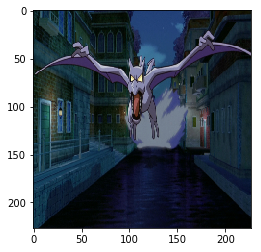

In [21]:
plt.imshow(IMG/255.0)

In [25]:
import random
random.seed(10)
X = np.array(image_data)
Y = np.asarray(labels).astype('float32')
X=cv2.cvtsda

from sklearn.utils import shuffle
X,Y = shuffle(X,Y,random_state=2)
X = X/255.0

In [33]:
from keras.models import Sequential 
from keras.layers import Convolution2D,MaxPooling2D,Dense,Input,Flatten,Dropout
import tensorflow as tf

In [35]:
from keras.utils import np_utils

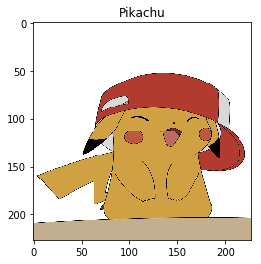

In [231]:
plt.imshow(X[1000])
plt.title(labels_dict[Y[1000]])
plt.show()

In [232]:
Y_categorical=np_utils.to_categorical(Y)

In [2]:
model=Sequential()


NameError: name 'Sequential' is not defined

In [267]:
from keras.layers.normalization import BatchNormalization

In [268]:
model.add(BatchNormalization())


In [269]:
model.add(Convolution2D(256,(5,5),activation='relu',strides=1,padding='same'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_56 (Conv2D)           (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_22 (Batc (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 27, 27, 256)       614656    
Total params: 649,984
Trainable params: 649,792
Non-trainable params: 192
_________________________________________________________________


In [270]:
model.add(MaxPooling2D((3,3),strides=2))

In [271]:
model.add(BatchNormalization())
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_56 (Conv2D)           (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_22 (Batc (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 27, 27, 256)       614656    
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 13, 13, 256)       0         
_________________________________________________________________
batch_normalization_23 (Batc (None, 13, 13, 256)       1024      
Total params: 651,008
Trainable params: 650,304
Non-trainable params: 704
_________________________________________________________________


In [272]:
model.add(Convolution2D(384,(3,3),activation='relu',strides=1,padding='same'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_56 (Conv2D)           (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_22 (Batc (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 27, 27, 256)       614656    
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 13, 13, 256)       0         
_________________________________________________________________
batch_normalization_23 (Batc (None, 13, 13, 256)       1024      
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 13, 13, 384)       885120    
Total para

In [273]:
model.add(Convolution2D(384,(3,3),activation='relu',strides=1,padding='same'))

In [274]:
model.add(Convolution2D(256,(3,3),activation='relu',strides=1,padding='same'))

In [275]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_56 (Conv2D)           (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_22 (Batc (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 27, 27, 256)       614656    
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 13, 13, 256)       0         
_________________________________________________________________
batch_normalization_23 (Batc (None, 13, 13, 256)       1024      
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 13, 13, 384)       885120    
__________

In [276]:
model.add(MaxPooling2D((3,3),strides=2))

In [277]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_56 (Conv2D)           (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_22 (Batc (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 27, 27, 256)       614656    
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 13, 13, 256)       0         
_________________________________________________________________
batch_normalization_23 (Batc (None, 13, 13, 256)       1024      
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 13, 13, 384)       885120    
__________

In [278]:
model.add(Flatten())

In [279]:
model.add(Dense(4096,activation='relu'))

In [280]:
model.add(Dropout(0.5))

In [281]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_56 (Conv2D)           (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_22 (Batc (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 27, 27, 256)       614656    
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 13, 13, 256)       0         
_________________________________________________________________
batch_normalization_23 (Batc (None, 13, 13, 256)       1024      
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 13, 13, 384)       885120    
__________

In [282]:
model.add(Dense(4096,activation='relu'))
model.add(Dropout(0.5))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_56 (Conv2D)           (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_22 (Batc (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 27, 27, 256)       614656    
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 13, 13, 256)       0         
_________________________________________________________________
batch_normalization_23 (Batc (None, 13, 13, 256)       1024      
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 13, 13, 384)       885120    
__________

In [283]:
model.add(Dense(1000,activation='relu'))
model.add(Dropout(0.4))

In [284]:
model.add(BatchNormalization())

In [285]:
model.add(Dense(10,activation='softmax'))

In [286]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_56 (Conv2D)           (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_22 (Batc (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 27, 27, 256)       614656    
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 13, 13, 256)       0         
_________________________________________________________________
batch_normalization_23 (Batc (None, 13, 13, 256)       1024      
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 13, 13, 384)       885120    
__________

In [287]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(X,Y_categorical, batch_size=256, epochs=1, verbose=1,validation_split=0.2, shuffle=True)

Train on 1127 samples, validate on 282 samples
Epoch 1/1
